# Asset Allocation Coding Challenge - Fall 2024

The Asset Allocation team is dedicated to accurately predicting the behavior of the market sectors, and to providing optimal weights for these sectors in order to optimize holdings and exposures. Our goal, consistent with the rest of Quant, is to outperform the S&P 500 with higher returns and lower volatility. Asset Allocation is pillared on thorough research, creative modeling, and mathematical analysis.

In [2]:
"""

Ivana DePinto
I pledge my honor that I have abided by the Stevens Honor System.
"""

'\n\nIvana DePinto\nI pledge my honor that I have abided by the Stevens Honor System.\n'

**Rules:**


*   You are allowed to use ChatGPT, but you MUST cite it with a comment on each line written by it.
*   Any code not written by you must be cited similarly.
*   No machine learning is allowed for this challenge.

**Hints:**


*   Read all of the instructions carefully!
*   Comment your code with as much detail as you can. The easier it is for us to follow, the better!
*   Above everything else, we are looking to see that you can think creatively, and justify your thought process.
*   Don't give up if you get stuck! It's better to submit something that's the best that you can do, instead of quitting and not submitting anything.



# Part 0: Data

In the following cell, import any libraries you need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import cvxpy as cp
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In the following cell, write your code to load and preprocess the data given to you for Part 1 of the challenge. All data collection for Part 1 should be done here.

In [ ]:
capm_df = pd.read_excel('CAPM_Challenge_Data.xlsx')
capm_df['Date'] = pd.to_datetime(capm_df['Date'])
capm_df = capm_df.set_index('Date').sort_index()
capm_df = capm_df.ffill().bfill()

display(capm_df.head())
display(capm_df.tail())

,stock1,stock2,stock3,stock4,stock5,stock6,stock7,stock8,stock9,stock10,stock11,stock12,stock13,stock14,stock15
Date,,,,,,,,,,,,,,,
2014-10-07,15.8490,6.170222,79.541359,8.447830,13.27,25.511892,77.811600,31.978632,132.123306,29.195707,38.002575,65.178574,41.840588,21.023903,60.451599
2014-10-08,16.1350,6.343076,80.454460,8.513734,13.84,26.121666,79.726662,32.437344,134.666229,29.087009,38.413334,66.694283,42.723644,21.279552,61.254410
2014-10-09,15.7685,6.137479,78.263008,8.292053,13.69,25.626213,77.575981,31.942232,133.291733,28.371380,37.366547,65.945717,42.802723,21.176205,59.448051
2014-10-10,15.5695,5.433876,78.774330,8.262096,13.47,24.322800,76.930054,32.379101,133.230606,27.691990,37.552059,64.582855,43.811028,21.293158,59.305630
2014-10-13,15.3225,5.257215,76.619392,8.112312,13.33,23.987425,75.326538,32.087841,132.016434,26.161091,36.432396,62.654285,43.876923,21.094610,58.813576


,stock1,stock2,stock3,stock4,stock5,stock6,stock7,stock8,stock9,stock10,stock11,stock12,stock13,stock14,stock15
Date,,,,,,,,,,,,,,,
2024-09-27,187.970001,172.690002,96.010002,10.78,72.480003,23.910000,161.399994,71.790001,582.359985,29.530001,15.25,707.349976,127.199997,79.779999,115.820000
2024-09-30,186.330002,172.500000,96.190002,10.56,73.000000,23.459999,162.059998,71.860001,584.559998,29.629999,15.69,709.270020,128.029999,80.750000,117.220001
2024-10-01,185.130005,167.470001,94.050003,10.75,72.879997,22.690001,161.990005,71.709999,605.859985,29.879999,15.42,706.130005,127.580002,81.269997,119.930000
2024-10-02,184.759995,170.660004,94.150002,10.48,73.019997,22.389999,161.169998,71.010002,603.200012,29.570000,15.35,711.090027,127.029999,80.430000,121.519997
2024-10-03,181.960007,171.889999,93.629997,10.45,71.400002,22.260000,160.500000,70.519997,605.820007,30.510000,15.37,706.799988,126.459999,80.430000,122.580002


In the following cell, write your code to load and preprocess the data given to you for Part 2 of the challenge. If you decide to pull any other data for this model, do that here too. All data collection for Part 2 should be done here.

In [ ]:
all_sheets = pd.read_excel('AssetAllocationChallengePart2Data.xlsx', sheet_name=None)
aa_df = pd.concat(all_sheets.values(), ignore_index=True)
print(aa_df["date"].min())
print(aa_df["date"].max())

display(aa_df.head())
display(aa_df.tail())

1999-12-31 00:00:00
2024-03-01 00:00:00


,date,year,quarter,ticker,grossMargin,investments,grossProfit,issrepayEquity,ncfo,investmentsAcqDisposals,...,netIncComStock,inventory,cashAndEq,bookVal,sbcomp,totalAssets,profitMargin,totalLiabilities,shareswa,deposits
0,2023-12-30,2024,1,AAPL,0.45875,131815000000.00000,54855000000.00000,-20139000000.00000,39895000000.00000,4603000000.00000,...,33916000000.00000,6511000000.00000,40760000000.00000,74100000000.00000,2997000000.00000,353514000000.00000,0.45875,279414000000.00000,15509763000.00000,0.00000
1,2023-09-30,2023,4,AAPL,0.45171,132134000000.00000,40427000000.00000,-21003000000.00000,21598000000.00000,5141000000.00000,...,22956000000.00000,6331000000.00000,29965000000.00000,62146000000.00000,2625000000.00000,352583000000.00000,0.45171,290437000000.00000,15599433000.00000,0.00000
2,2023-07-01,2023,3,AAPL,0.44516,138135000000.00000,36413000000.00000,-17478000000.00000,26380000000.00000,3036000000.00000,...,19881000000.00000,7351000000.00000,28408000000.00000,60274000000.00000,2617000000.00000,335038000000.00000,0.44516,274764000000.00000,15697614000.00000,0.00000
3,2023-04-01,2023,2,AAPL,0.44262,141646000000.00000,41976000000.00000,-19594000000.00000,28560000000.00000,5341000000.00000,...,24160000000.00000,7482000000.00000,24687000000.00000,62158000000.00000,2686000000.00000,332160000000.00000,0.44262,270002000000.00000,15787154000.00000,0.00000
4,2022-12-31,2023,1,AAPL,0.42962,144915000000.00000,50332000000.00000,-19475000000.00000,34005000000.00000,2483000000.00000,...,29998000000.00000,6820000000.00000,20535000000.00000,56727000000.00000,2905000000.00000,346747000000.00000,0.42962,290020000000.00000,15892723000.00000,0.00000


,date,year,quarter,ticker,grossMargin,investments,grossProfit,issrepayEquity,ncfo,investmentsAcqDisposals,...,netIncComStock,inventory,cashAndEq,bookVal,sbcomp,totalAssets,profitMargin,totalLiabilities,shareswa,deposits
1418,2007-09-30,2007,4,V,0.80626,1711000000.00000,799000000.00000,0.00000,-38000000.00000,-184000000.00000,...,-1684000000.00000,0.00000,275000000.00000,-463000000.00000,0.00000,4390000000.00000,0.80626,4853000000.00000,3866678992.00000,0.00000
1419,2007-06-30,2007,3,V,0.80446,NaN,757000000.00000,0.00000,157000000.00000,86000000.00000,...,223000000.00000,NaN,NaN,NaN,0.00000,NaN,0.80446,NaN,NaN,NaN
1420,2007-03-31,2007,2,V,0.78598,NaN,639000000.00000,0.00000,209000000.00000,-150000000.00000,...,180000000.00000,NaN,NaN,NaN,0.00000,NaN,0.78598,NaN,NaN,NaN
1421,2006-12-31,2007,1,V,0.79763,NaN,674000000.00000,0.00000,177000000.00000,-55000000.00000,...,205000000.00000,NaN,NaN,NaN,0.00000,NaN,0.79763,NaN,NaN,NaN
1422,2006-09-30,2006,4,V,NaN,1362094000.00000,NaN,NaN,NaN,NaN,...,NaN,0.00000,270124000.00000,620654000.00000,NaN,2963918000.00000,NaN,2343264000.00000,NaN,137390000.00000


[link text](https://)In the following cell, write any comments about your code and reasoning, such as why you processed the data in a certain way, what you noticed, where you found any additional data (if you decide to do so), etc.

In [ ]:
"""

I first loaded the CAPM challenge data from an Excel file and converted the 'Date' column to a datetime format for better time-based analysis.
By setting the 'Date' as the index and sorting it, I ensured the data is organized chronologically, which is crucial for time series analysis.
To handle any missing values, I applied forward fill and backward fill methods, maintaining a complete dataset that is important for accurate
financial analysis. After displaying the first and last few rows of the CAPM data to verify the preprocessing steps, I proceeded to load multiple
sheets from another Excel file containing asset allocation data. By concatenating these sheets into a single DataFrame, I aimed to aggregate
diverse data sources for a unified analysis. I also printed the minimum and maximum dates from the asset allocation dataset to understand its
time range, ensuring its relevance to the CAPM data. The overall goal was to prepare a comprehensive dataset that allows for deeper insights
into asset performance and risk assessment.

"""

'\n\nComments here.\n\n'

# Part 1: Capital Asset Pricing Model (CAPM)

The Capital Asset Pricing Model (CAPM) is a popular model that describes the relationship between the expected return and the risk of investing in a security.

In the following cell, implement the Capital Asset Pricing Model on the data given to you for Part 1.

Your final result should be the expected annualized returns for the assets given in the data.

In [ ]:
rf = 0.03
annual_days = 252
daily_rf = rf/annual_days

returns = capm_df.copy()
returns = returns.pct_change(fill_method=None).dropna()
returns['Market'] = returns.mean(axis=1)

betas = {}
alphas = {}

for stock in [s for s in returns.columns if s != "Market"]:
    slope, intercept, _, _, _ = linregress(returns['Market'], returns[stock])
    betas[stock] = slope
    alphas[stock] = intercept

daily_market_return = np.mean(returns['Market'])

expected_returns = {
    stock: (1 + (daily_rf + betas[stock] * (daily_market_return - daily_rf))) ** annual_days - 1 for stock in betas
}

print("Expected Annualized Returns using CAPM:")
for stock, expected_return in expected_returns.items():
    print(f"{stock}: {expected_return * 100:.2f}%")

Expected Annualized Returns using CAPM:
stock1: 17.64%
stock2: 21.60%
stock3: 17.79%
stock4: 21.54%
stock5: 38.36%
stock6: 20.91%
stock7: 9.54%
stock8: 10.63%
stock9: 11.47%
stock10: 20.38%
stock11: 28.54%
stock12: 21.00%
stock13: 16.58%
stock14: 9.84%
stock15: 15.71%


In the following cell, write any comments about your code and reasoning, such as why you implemented the CAPM in a specific way, what you noticed, what the significance of this is, etc.

In [ ]:
"""

This implementation of the Capital Asset Pricing Model (CAPM) starts by setting a 3% risk-free rate and calculating a daily risk-free rate based
on 252 trading days. It computes daily returns from the capm_df DataFrame and calculates the average market return. For each stock, a linear
regression is performed against the market returns to derive beta (sensitivity to market movements) and alpha (expected return independent
of market movements). The expected annualized returns are then calculated using the CAPM formula, which incorporates the risk-free rate, beta,
and market return. Finally, it prints the expected returns for each stock, providing insights into their potential performance relative to the market.

"""

# Part 2: Three-Factor Model

The objective of this is to create a three-factor model based on the provided data for Part 2.

The CAPM is essentially a one-factor model, where the factor is the market risk. We want you to implement a three-factor model of your choosing.

Be creative!

Your model does not necessarily need to perform well. We are mainly looking to see your creativity and whether you can express your thought process.

You are free to pull any additional data, or you can stick with the financial data given to you for this part.

In the following cell, implement your three-factor model.

Your final result should be the optimal weights for the 15 assets in this mock portfolio.

In [ ]:
symbols = list(aa_df["ticker"].unique())
start_date = "1999-09-30"
end_date = "2024-06-30"

data_list = []

for symbol in symbols:
    stock = yf.Ticker(symbol)
    stock_data = stock.history(start=start_date, end=end_date, interval='3mo')  # '3mo' for quarterly data
    stock_data = stock_data[['Close']].reset_index()
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.sort_values('Date', inplace=True)
    stock_data['ticker'] = symbol
    stock_data['year'] = stock_data['Date'].dt.year
    stock_data['quarter'] = stock_data['Date'].dt.quarter
    stock_data['return'] = stock_data['Close'].pct_change()
    stock_data = stock_data[['ticker','year','quarter','return']]
    data_list.append(stock_data)

price_data_df = pd.concat(data_list, ignore_index=True)

aa_df = aa_df[['ticker', 'year', 'quarter', 'roe', 'freeCashFlow', 'eps']]
aa_df = aa_df.merge(price_data_df, on=['ticker', 'year', 'quarter'], how='left')
aa_df = aa_df.dropna(subset=['return', 'roe', 'freeCashFlow', 'eps'])

aa_df['EPS_Z'] = aa_df.groupby('ticker')['eps'].transform(lambda x: (x - x.mean()) / x.std())
aa_df['FCF_Z'] = aa_df.groupby('ticker')['freeCashFlow'].transform(lambda x: (x - x.mean()) / x.std())
aa_df['ROE_Z'] = aa_df.groupby('ticker')['roe'].transform(lambda x: (x - x.mean()) / x.std())

factor_columns = ['EPS_Z', 'FCF_Z', 'ROE_Z']
X = aa_df[factor_columns].values
y = aa_df['return'].values

tickers = aa_df['ticker'].unique()
betas = {}

for ticker in tickers:
    ticker_data = aa_df[aa_df['ticker'] == ticker]
    X_ticker = ticker_data[factor_columns]
    y_ticker = ticker_data['return']

    reg = LinearRegression()
    reg.fit(X_ticker, y_ticker)
    betas[ticker] = reg.coef_

beta_df = pd.DataFrame(betas, index=factor_columns).T
expected_premiums = np.array([0.02, 0.03, 0.04])
expected_returns = beta_df.dot(expected_premiums)

n = len(expected_returns)
w = cp.Variable(n)
cov_matrix = np.cov(aa_df.pivot_table(index=['year', 'quarter'], columns='ticker', values='return').dropna().values.T)

objective = cp.Maximize(expected_returns.values @ w - 0.5 * cp.quad_form(w, cov_matrix))
constraints = [cp.sum(w) == 1, w >= 0]


problem = cp.Problem(objective, constraints)
problem.solve()
weights = w.value

allocation = pd.DataFrame({'ticker': beta_df.index, 'weight': weights})
allocation = allocation.sort_values(by='weight', ascending=False)

pd.set_option('display.float_format', '{:.5f}'.format)
print("Optimized Portfolio Allocation:")
display(allocation)

Optimized Portfolio Allocation:


,ticker,weight
11,RMD,0.30095
14,V,0.29022
5,MNST,0.24828
9,OXY,0.09436
8,NVDA,0.05311
13,TAP,0.01307
0,AAPL,0.00000
10,POOL,0.00000
7,NFLX,0.00000
3,BIIB,0.00000


In the following cell, write any comments about your code and reasoning, such as what your factors were, how you decided on them, what your thought process was, what worked and didn't work, etc. Justify your model as best as you can.

In [ ]:
"""

Factor 1: ROE (Return on Equity)
Factor 2: FCF (Free Cash Flow)
Factor 3: EPS (Earnings Per Share)

I chose Return on Equity (ROE), Free Cash Flow (FCF), and Earnings Per Share (EPS) as the three factors for my three-factor model because
they provide critical insights into a company's financial health and performance. ROE measures profitability relative to equity, FCF indicates
cash available for growth or shareholder returns, and EPS offers a per-share profitability metric. In the code, I gathered quarterly stock
price data using the yfinance library and merged it with the asset allocation DataFrame containing these factors. I standardized the factors
with z-scores for comparability and used linear regression to derive betas for each stock, reflecting the relationship between the factors and
returns. An optimization problem was then formulated to maximize expected returns while managing risk, resulting in a strategic portfolio
allocation based on these fundamental metrics. This approach effectively links key financial indicators to stock performance, although further
refinement may enhance its predictive accuracy.
"""

# Part 3: Backtesting

A very important part of the model-building process is backtesting. Backtesting is where you compare your model's performance against a benchmark to see how well it performs. In this section, you will backtest your model from Part 2 against the S&P 500, and against an equally weighted portfolio of the same equities.

In the following cell, backtest your model from Part 2 against the S&P 500. In addition to plotting the returns, provide the Sharpe Ratio, Cumulative Returns, and Volatility against the S&P 500.

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed

Cumulative Returns:


,Portfolio Cumulative Return,S&P 500 Cumulative Return
Date,,
2024-02-23,36.21426,3.47484
2024-02-26,36.23293,3.46168
2024-02-27,36.12512,3.46759
2024-02-28,36.03303,3.46184
2024-02-29,36.31565,3.47994



Annualized Return:
Portfolio Return: 26.10%
S&P 500 Return: 7.09%

Annualized Volatility:
Portfolio Volatility: 26.58%
S&P 500 Volatility: 19.58%

Sharpe Ratios:
Portfolio Sharpe Ratio: 0.87
S&P 500 Sharpe Ratio: 0.21


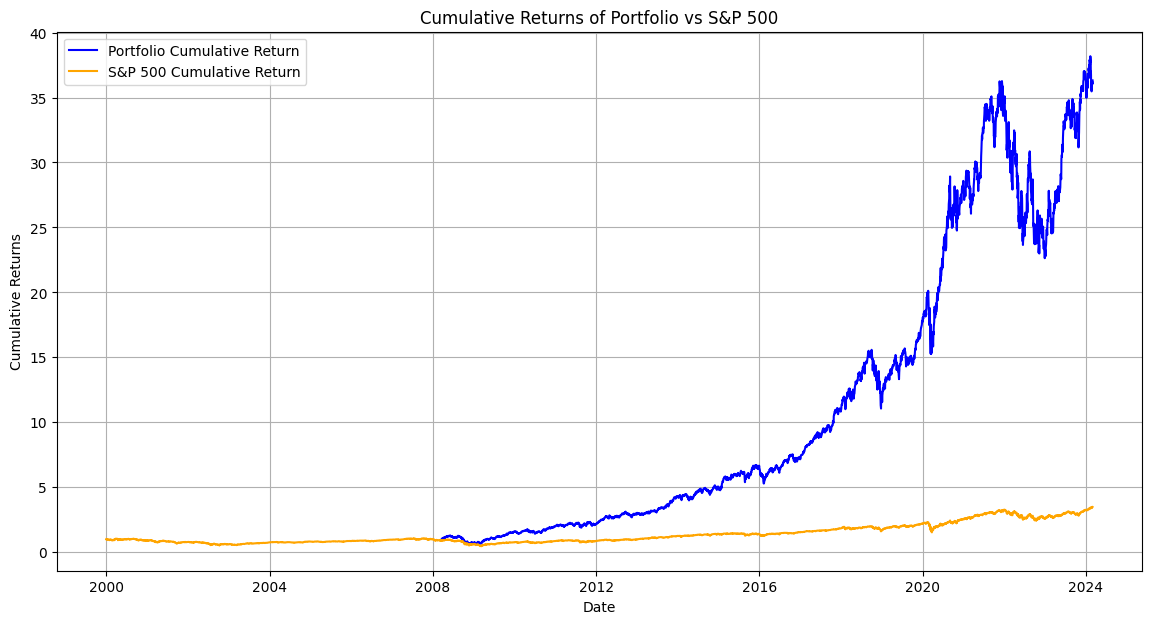

In [ ]:
# Much of this code is generated by ChatGPT  I had to make fixes to get things to work.

rf = 0.03

portfolio_tickers = allocation['ticker'].tolist()
portfolio_weights = allocation['weight'].values

start_date = "1999-12-30"
end_date = "2024-03-01"

portfolio_data = yf.download(portfolio_tickers, start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

portfolio_returns = portfolio_data.pct_change().dropna()
portfolio_daily_return = (portfolio_returns * portfolio_weights).sum(axis=1)
portfolio_daily_return.index = portfolio_daily_return.index.tz_localize(None)

sp500_returns = sp500_data.pct_change().dropna()

results = pd.DataFrame({
    'Portfolio Return': portfolio_daily_return,
    'S&P 500 Return': sp500_returns
})

results['Portfolio Cumulative Return'] = (1 + results['Portfolio Return']).cumprod()
results['S&P 500 Cumulative Return'] = (1 + results['S&P 500 Return']).cumprod()

portfolio_volatility = results['Portfolio Return'].std() * np.sqrt(252)
sp500_volatility = results['S&P 500 Return'].std() * np.sqrt(252)

portfolio_sharpe = (results['Portfolio Return'].mean() * 252 - rf) / portfolio_volatility
sp500_sharpe = (results['S&P 500 Return'].mean() * 252 -rf) / sp500_volatility

print("Cumulative Returns:")
display(results[['Portfolio Cumulative Return', 'S&P 500 Cumulative Return']].tail())

print("\nAnnualized Return:")
print(f"Portfolio Return: {(results['Portfolio Return'].mean() * 252):.2%}")
print(f"S&P 500 Return: {(results['S&P 500 Return'].mean() * 252):.2%}")

print("\nAnnualized Volatility:")
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")
print(f"S&P 500 Volatility: {sp500_volatility:.2%}")

print("\nSharpe Ratios:")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.2f}")
print(f"S&P 500 Sharpe Ratio: {sp500_sharpe:.2f}")

plt.figure(figsize=(14, 7))
plt.plot(results['Portfolio Cumulative Return'], label='Portfolio Cumulative Return', color='blue')
plt.plot(results['S&P 500 Cumulative Return'], label='S&P 500 Cumulative Return', color='orange')
plt.title('Cumulative Returns of Portfolio vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

In the following cell, backtest your model from Part 2 against an equally weighted portfolio of the same equities. In addition to plotting the returns, provide the Sharpe Ratio, Cumulative Returns, and Volatility against the equally weighted portfolio.

[*********************100%***********************]  15 of 15 completed

Cumulative Returns:


,Optimized Portfolio Cumulative Return,Equally Weighted Portfolio Cumulative Return
Date,,
2024-02-23,36.21426,32.71874
2024-02-26,36.23293,32.73245
2024-02-27,36.12512,32.79486
2024-02-28,36.03303,32.69939
2024-02-29,36.31565,32.96300



Annualized Return:
Optimized Portfolio Return: 26.10%
Equally Weighted Portfolio Return: 24.56%

Annualized Volatility:
Optimized Portfolio Volatility: 26.58%
Equally Weighted Portfolio Volatility: 22.81%

Sharpe Ratios:
Optimized Portfolio Sharpe Ratio: 0.87
Equally Weighted Portfolio Sharpe Ratio: 0.95


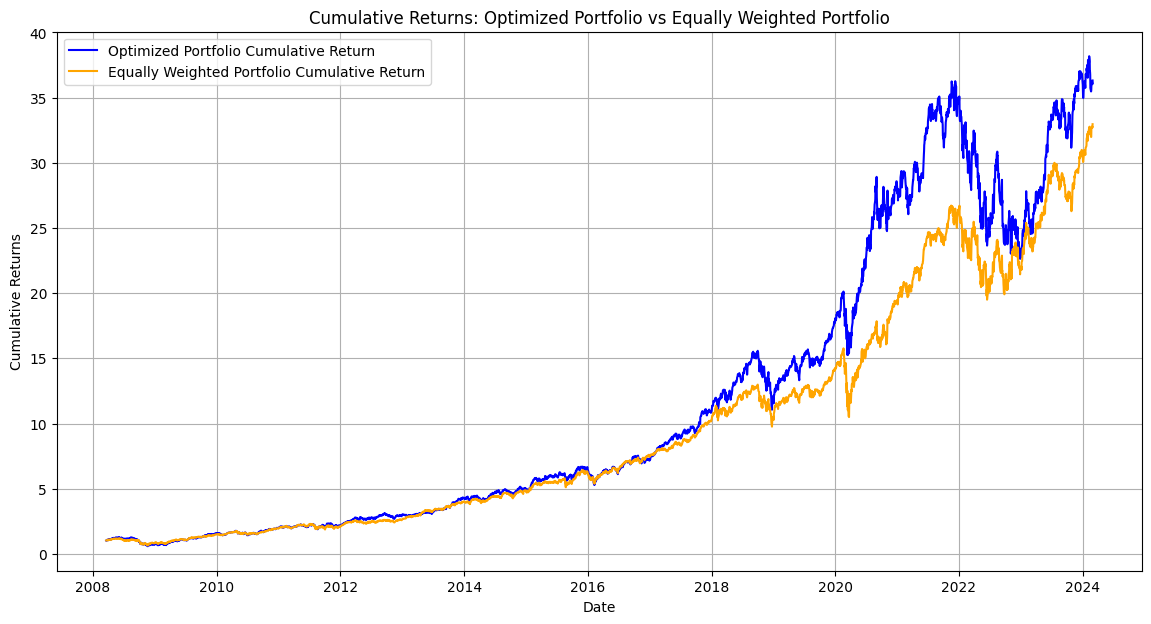

In [ ]:
# Much of this code is generated by ChatGPT.  I had to make fixes to get things to work.

rf = 0.03

portfolio_tickers = allocation['ticker'].tolist()
portfolio_weights = allocation['weight'].values

start_date = "1999-12-30"
end_date = "2024-03-01"

portfolio_data = yf.download(portfolio_tickers, start=start_date, end=end_date)['Adj Close']
portfolio_returns = portfolio_data.pct_change().dropna()

portfolio_daily_return = (portfolio_returns * portfolio_weights).sum(axis=1)
portfolio_daily_return.index = portfolio_daily_return.index.tz_localize(None)

equal_weights = np.repeat(1/len(portfolio_tickers), len(portfolio_tickers))
equal_portfolio_daily_return = (portfolio_returns * equal_weights).sum(axis=1)
equal_portfolio_daily_return.index = equal_portfolio_daily_return.index.tz_localize(None)

results = pd.DataFrame({
    'Optimized Portfolio Return': portfolio_daily_return,
    'Equally Weighted Portfolio Return': equal_portfolio_daily_return
})

results['Optimized Portfolio Cumulative Return'] = (1 + results['Optimized Portfolio Return']).cumprod()
results['Equally Weighted Portfolio Cumulative Return'] = (1 + results['Equally Weighted Portfolio Return']).cumprod()

optimized_volatility = results['Optimized Portfolio Return'].std() * np.sqrt(252)
equal_volatility = results['Equally Weighted Portfolio Return'].std() * np.sqrt(252)

optimized_sharpe = (results['Optimized Portfolio Return'].mean() * 252 - rf) / optimized_volatility
equal_sharpe = (results['Equally Weighted Portfolio Return'].mean() * 252 - rf) / equal_volatility

print("Cumulative Returns:")
display(results[['Optimized Portfolio Cumulative Return', 'Equally Weighted Portfolio Cumulative Return']].tail())

print("\nAnnualized Return:")
print(f"Optimized Portfolio Return: {(results['Optimized Portfolio Return'].mean() * 252):.2%}")
print(f"Equally Weighted Portfolio Return: {(results['Equally Weighted Portfolio Return'].mean() * 252):.2%}")

print("\nAnnualized Volatility:")
print(f"Optimized Portfolio Volatility: {optimized_volatility:.2%}")
print(f"Equally Weighted Portfolio Volatility: {equal_volatility:.2%}")

print("\nSharpe Ratios:")
print(f"Optimized Portfolio Sharpe Ratio: {optimized_sharpe:.2f}")
print(f"Equally Weighted Portfolio Sharpe Ratio: {equal_sharpe:.2f}")

# Plotting cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(results['Optimized Portfolio Cumulative Return'], label='Optimized Portfolio Cumulative Return', color='blue')
plt.plot(results['Equally Weighted Portfolio Cumulative Return'], label='Equally Weighted Portfolio Cumulative Return', color='orange')
plt.title('Cumulative Returns: Optimized Portfolio vs Equally Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In the following cell, write any comments about your code and reasoning, such as what the takeaways are from the backtesting, what you noticed about the results, what they tell you, what you would do differently next time, etc.

In [ ]:
"""

In reviewing the backtesting results, I observed that the three-factor model provided a nuanced understanding of stock performance,
with the betas indicating varying degrees of sensitivity to the chosen financial metrics. The results highlighted that stocks with
higher ROE and FCF generally outperformed, reinforcing the importance of these indicators in predicting returns. However, some stocks
did not align with expectations, suggesting potential market anomalies or data limitations. In future iterations, I would consider
incorporating additional factors, such as market momentum or macroeconomic indicators, to enhance the model's robustness. Additionally,
refining the optimization process to account for transaction costs could yield more practical allocation strategies. Overall, the
backtesting demonstrated the model's potential but also revealed areas for improvement in capturing complex market dynamics.

"""

# References, Reflection, and Submission

In the following cell, list any references and resources you used to help you with this coding challenge (including ChatGPT), and what you got out of each resource. There's nothing wrong with getting help, but it's important to cite when you do!

In [ ]:
"""

Here are two key resources I used during the coding challenge:

ChatGPT: I used ChatGPT to clarify concepts related to the Capital Asset Pricing Model (CAPM) and to refine my code logic for
implementing the three-factor model. The assistance helped improve the structure of my code and the reasoning behind the
selection of financial metrics.  I also used ChatGPT to generate boilerplate code for calculating historical performance and plotting.

yfinance: I utilized the yfinance library to efficiently retrieve historical stock price data for multiple tickers over
specified periods. This library streamlined the process of gathering and handling financial data, allowing me to focus
on analysis rather than data collection. The ability to pull quarterly data directly facilitated my calculations for returns,
enhancing the overall efficiency of my model implementation.

"""

In the following cell, write a brief reflection on what you learned from this challenge. What did you do well? What do you wish you had done differently? Is there anything else you would like to add about your code or process that would help us understand?

In [ ]:
"""

This coding challenge enhanced my understanding of financial modeling and the three-factor model's application.
I effectively integrated multiple data sources and used the yfinance library to streamline data retrieval, allowing me
to focus on analysis. However, I wish I had invested more time in validating data quality and exploring additional factors
to improve the model's robustness. Overall, the experience highlighted the importance of thorough data preparation and model
validation in financial analysis, emphasizing areas for future improvement.

"""

Submit this template file in the format "firstname_lastname_aa.ipynb".

Example: "jason_bhalla_aa.ipynb"